# Вариант 7. 
Заменить пропущенные значения в столбце x на средние по столбцу, удалить строки, которые содержат пропуски в столбце y, выявить выбросы
в столбце x и заменить их интерполяцией. Построить диаграмму рассеяния с
уменьшенным размером маркера, скрипичные диаграммы и диаграмму рассеяния по случайной выборке из 7 значений.

### Импорты

In [22]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Загрузка данных

In [13]:
FILENAME = "sem_4.xlsx"
TASK_VARIANT = 7

data_path = Path() / "data" / FILENAME
df = pd.read_excel(data_path, sheet_name=str(TASK_VARIANT), header=0, index_col=0)
df

,0,1
0,7.968888,-7.522656
1,0.891551,-1.049142
2,14.264462,-13.999222
3,5.488584,-7.187490
4,-14.180905,12.670542
...,...,...
995,3.554238,-3.712213
996,-1.571807,-0.194909
997,11.496638,-10.808436
998,3.020979,-1.664384


Переименуем столбцы 0 и 1 на x и y соответственно

In [14]:
df.rename(columns={0: "x", 1: "y"}, inplace=True)
df

,x,y
0,7.968888,-7.522656
1,0.891551,-1.049142
2,14.264462,-13.999222
3,5.488584,-7.187490
4,-14.180905,12.670542
...,...,...
995,3.554238,-3.712213
996,-1.571807,-0.194909
997,11.496638,-10.808436
998,3.020979,-1.664384


### Выявление пропущенных значений в столбцах

In [15]:
df.isna().sum()

x    2
y    2
dtype: int64

In [16]:
nans = df[df.isna().any(axis=1)]
nans

,x,y
92,12.566634,NaN
186,NaN,1.730988
235,11.296333,NaN
896,NaN,-7.371867


### Замена пропущенных значений

#### Замены пустых значений на среднее по столбцу в столбце x

In [17]:
df.x = df.x.fillna(df.x.mean())
df.iloc[nans.index]

,x,y
92,12.566634,NaN
186,-1.701321,1.730988
235,11.296333,NaN
896,-1.701321,-7.371867


#### Удаление строк с пропущенными значениями в столбце y

In [18]:
df.drop(df[df.y.isna()].index, inplace=True)
df.iloc[nans.index]

,x,y
93,15.003482,-13.033718
187,-2.251463,3.154128
237,15.040281,-14.651516
898,11.727639,-11.074459


#### Выявление выбросов в столбце x

In [19]:
q1 = df.x.quantile(0.25)
q3 = df.x.quantile(0.75)
iqr = q3 - q1
outliers = df[(df.x < q1 - 1.5 * iqr) | (df.x > q3 + 1.5 * iqr)]
df.loc[outliers.index, "x"]

11     -317.073473
47       24.738310
89      419.647762
279   -1004.194426
446     223.659171
483      27.621933
519    -381.640328
593      28.871212
664    -579.799086
791     -22.722028
961     -23.817572
Name: x, dtype: float64

#### Замена выбросов интерполяцией

In [20]:
df.loc[outliers.index, "x"] = np.nan
x_interpolated = df.x.interpolate().loc[outliers.index]
df.loc[outliers.index, "x"] = x_interpolated

print(df.loc[outliers.index, "x"])

11      2.554214
47      2.933494
89      9.434935
279    -3.750983
446     4.973370
483     0.191241
519    -0.673511
593    11.217831
664    -2.363720
791    -0.719030
961     3.677272
Name: x, dtype: float64


#### Генерация случайной выборки из семи значений

In [27]:
SAMPLE_SIZE = 7
RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
sample = df.sample(SAMPLE_SIZE)
sample

,x,y
455,13.087763,-11.426135
794,-1.017480,-0.781979
210,3.427510,-2.814013
311,-8.652568,9.603418
741,4.911974,-4.566981
580,2.893110,-2.072694
852,4.281828,-3.441189


#### Построение диаграмм

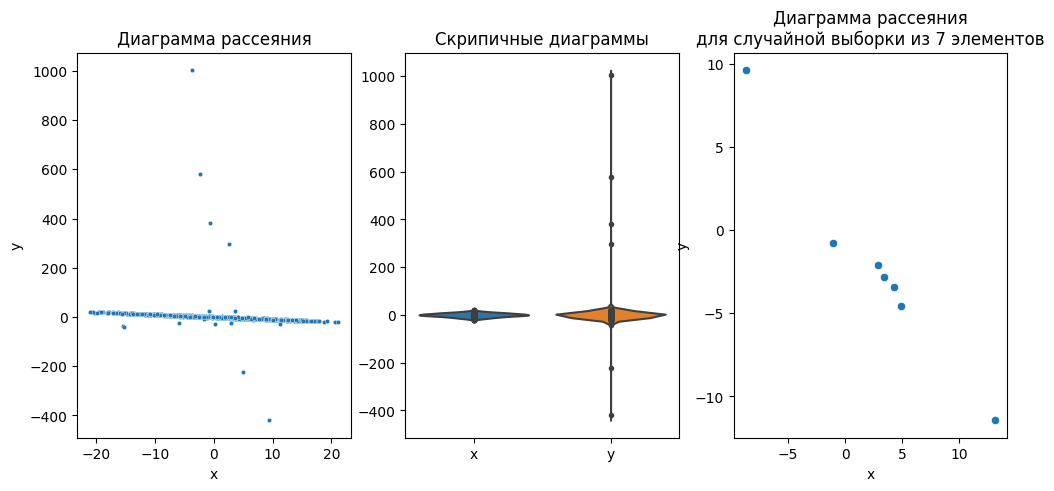

In [67]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x="x", y="y", data=df, s=10).set_title("Диаграмма рассеяния")

plt.subplot(1, 3, 2)
sns.violinplot(data=df, inner="point", linewidth=1.5).set_title("Скрипичные диаграммы")

plt.subplot(1, 3, 3)
sns.scatterplot(x="x", y="y", data=sample)\
    .set_title("Диаграмма рассеяния\nдля случайной выборки из 7 элементов")

plt.show()